# Explicación muy breve de esta imagen:
![alt text](https://pbs.twimg.com/media/D3y7CU9X4AEgL4O.jpg "Logo Title Text 1")

## Generación de GRMD simplificado
**GRMD**: *general-relativistic magnetohydrodynamic*


El modelo GRMD representa la distribición de material en un sistema regido en gran medida por la mecánica relativista.

In [20]:
def CircEq(x,y,r,th):
    """
    Retorna verdadero si a entra dentro del intervalo
    r +/- th y falso en caso contrario
    """
    a = (x-X/2)**2+(y-Y/2)**2
    b = r**2
    if a <= b+th and a >= b-th:
        return True
    else:
        return False

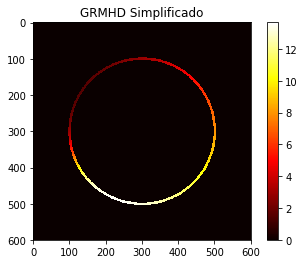

In [80]:
import numpy as np
import matplotlib.pyplot as plt

Y = 600
X = Y
GRMHD = np.zeros([X,Y])
for i in range(X):
    for j in range(Y):
        if CircEq(i,j,200,(37)**2):
            GRMHD[i][j] = 10*np.cos((np.angle((i-200)+(1j*j-200))))+10 

#Grafica            
fig, ax = plt.subplots()
ims = ax.imshow(GRMHD,cmap='hot')
ax.set_title("GRMHD Simplificado")
fig.colorbar(ims)
plt.show()

## Patrón de una antena parabólica 
Entre mayor sea el diametro del disco, más estrecho será la extención angular del lóbulo principal. Este patrón representa el grado de "preferencia" en la recepción según la dirección en la que llega la señal.  
![alt text](http://gpbt.info/wp-content/uploads/2019/01/homemade-satellite-dish-stand-this-is-a-simplified-drawing-of-the-dish-radiation-pattern-we-always-think-of-a-dish-as-a-sort-of-searchlight-looking-for-the-sat-signal.jpg "Logo Title Text 1")

## Patrón de antena del radiotelescopio equivalente
El método por el cual fue obtenida la radioimagen del agujero negro es complejo y muy poco intuitivo. Para simplificar el proceso supondremos que fue obtenida por un radiotelescopio con un disco del tamaño de la Tierra

### Distribución geográfica de los radiotelescopios usados
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/eb/The_Event_Horizon_Telescope_and_Global_mm-VLBI_Array_on_the_Earth.jpg "Logo Title Text 1")

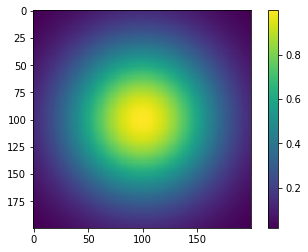

In [76]:
# resolución angulat = 60 microarcosegundos
x, y = np.meshgrid(np.linspace(-1,1,200), np.linspace(-1,1,200))
d = np.sqrt(x*x+y*y)
sigma, mu = 0.5, 0.0
g = np.exp(-((d-mu)**2/( 2.0 * sigma**2)))

#Gráfica
fig,ax = plt.subplots()
gim = ax.imshow(g)
fig.colorbar(gim)
plt.show()

# La razón de la imagen borrosa

## Convolución espacial:
$ f(x,y)\ast g(x,y) = \int_{\tau_1=-\infty}^{\infty} \int_{\tau_2=-\infty}^{\infty} f(\tau_1 , \tau_2) \cdot g(x-\tau_1,y-\tau_2) \cdot d\tau_1 d\tau_2$

Esta función modela el proceso del barrido de una antena del tamaño del mundo a lo largo de la extención angular del agujero negro. Vuelvo a recordar que esto es una simplificación. El proceso utilizado en la realidad se llama *interferometría de muy larga base*. Sin embargo los resultados son equivalentes.

In [90]:
from scipy import signal

RIM = signal.convolve2d(GRMHD,g)/X

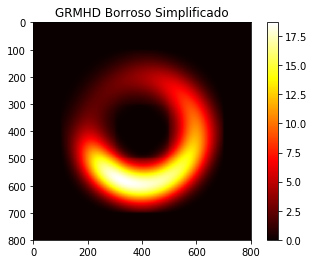

In [92]:
fig, ax = plt.subplots()
ims = ax.imshow(RIM,cmap='hot')
ax.set_title("GRMHD Borroso Simplificado")
fig.colorbar(ims)
plt.show()